# Public WiFi in Open Spaces Data Profile

This notebook provides a comprehensive profile of the WiFi in public spaces dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette('husl')

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the dataset
df = pd.read_csv('data/wi-fi_in_public_space__open_space__20250923.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (639, 13)
Columns: ['OID', 'Hotspot Dataset Object ID', 'Public Space (Open Space) Name', 'Public Space (Open Space) Proximity', 'Borough Name', 'Neighborhood Tabulation Area Code (NTA CODE)', 'Neighborhood Tabulation Area Name (NTA NAME)', 'Number of Access Points per Public Space (Open Space)', 'Provider', 'SSID', 'Latitude', 'Longitude', 'Published Date']


## Dataset Overview

In [4]:
# Basic information about the dataset
print("=== DATASET INFO ===")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage().sum() / 1024:.2f} KB")

=== DATASET INFO ===
Number of rows: 639
Number of columns: 13

Column names and types:
OID                                                        int64
Hotspot Dataset Object ID                                  int64
Public Space (Open Space) Name                            object
Public Space (Open Space) Proximity                       object
Borough Name                                              object
Neighborhood Tabulation Area Code (NTA CODE)              object
Neighborhood Tabulation Area Name (NTA NAME)              object
Number of Access Points per Public Space (Open Space)      int64
Provider                                                  object
SSID                                                      object
Latitude                                                 float64
Longitude                                                float64
Published Date                                            object
dtype: object

Memory usage: 65.03 KB


In [5]:
# Display first few rows
print("=== FIRST 5 ROWS ===")
display(df.head())

=== FIRST 5 ROWS ===


,OID,Hotspot Dataset Object ID,Public Space (Open Space) Name,Public Space (Open Space) Proximity,Borough Name,Neighborhood Tabulation Area Code (NTA CODE),Neighborhood Tabulation Area Name (NTA NAME),Number of Access Points per Public Space (Open Space),Provider,SSID,Latitude,Longitude,Published Date
0,1,1400,Abe Stark Skating Rink,Inside,Brooklyn,BK21,Seagate-Coney Island,6,ALTICEUSA,GuestWiFi,40.57278,-73.98563,05/30/2019
1,2,1401,Abe Stark Skating Rink,Inside,Brooklyn,BK21,Seagate-Coney Island,6,ALTICEUSA,GuestWiFi,40.57267,-73.98562,05/30/2019
2,3,1402,Abe Stark Skating Rink,Inside,Brooklyn,BK21,Seagate-Coney Island,6,ALTICEUSA,GuestWiFi,40.57267,-73.98562,05/30/2019
3,4,1403,Abe Stark Skating Rink,Inside,Brooklyn,BK21,Seagate-Coney Island,6,ALTICEUSA,GuestWiFi,40.57267,-73.98575,05/30/2019
4,5,1404,Abe Stark Skating Rink,Inside,Brooklyn,BK21,Seagate-Coney Island,6,ALTICEUSA,GuestWiFi,40.57267,-73.98575,05/30/2019


In [6]:
# Check for missing values
print("=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
display(missing_df[missing_df['Missing Count'] > 0])

=== MISSING VALUES ===


,Column,Missing Count,Missing Percentage


## Geographic Analysis

In [7]:
# Geographic data analysis
print("=== GEOGRAPHIC STATISTICS ===")
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    print(f"Latitude range: {df['Latitude'].min():.4f} to {df['Latitude'].max():.4f}")
    print(f"Longitude range: {df['Longitude'].min():.4f} to {df['Longitude'].max():.4f}")
    print(f"Missing coordinates: {df[['Latitude', 'Longitude']].isnull().any(axis=1).sum()}")

=== GEOGRAPHIC STATISTICS ===
Latitude range: 40.5170 to 40.8942
Longitude range: -74.1910 to -73.7343
Missing coordinates: 0


In [8]:
# Borough and neighborhood analysis
print("=== BOROUGH ANALYSIS ===")
if 'Borough Name' in df.columns:
    borough_counts = df['Borough Name'].value_counts()
    print("Access points by borough:")
    display(borough_counts)
    
    # Unique spaces by borough
    if 'Public Space (Open Space) Name' in df.columns:
        unique_spaces = df.groupby('Borough Name')['Public Space (Open Space) Name'].nunique()
        print("\nUnique spaces by borough:")
        display(unique_spaces)

=== BOROUGH ANALYSIS ===
Access points by borough:


Borough Name
Brooklyn         166
Queens           154
Manhattan        142
Bronx            123
Staten Island     54
Name: count, dtype: int64


Unique spaces by borough:


Borough Name
Bronx            24
Brooklyn         34
Manhattan        29
Queens           27
Staten Island     8
Name: Public Space (Open Space) Name, dtype: int64

In [9]:
# Provider analysis
print("=== PROVIDER ANALYSIS ===")
if 'Provider' in df.columns:
    provider_counts = df['Provider'].value_counts()
    print("Access points by provider:")
    display(provider_counts)
    
    print(f"\nTotal providers: {df['Provider'].nunique()}")
    print(f"Most common SSID: {df['SSID'].value_counts().index[0]} ({df['SSID'].value_counts().iloc[0]} instances)")

=== PROVIDER ANALYSIS ===
Access points by provider:


Provider
SPECTRUM     343
ALTICEUSA    237
Fiberless     30
AT&T          27
Partner        2
Name: count, dtype: int64


Total providers: 5
Most common SSID: GuestWiFi (580 instances)


## Temporal Analysis

In [10]:
# Date analysis
if 'Published Date' in df.columns:
    print("=== TEMPORAL ANALYSIS ===")
    df['Published Date'] = pd.to_datetime(df['Published Date'])
    
    print(f"Date range: {df['Published Date'].min()} to {df['Published Date'].max()}")
    
    # Publication patterns
    date_counts = df['Published Date'].value_counts().sort_index()
    print(f"\nMost common publication dates:")
    display(date_counts.head())

=== TEMPORAL ANALYSIS ===
Date range: 2019-05-30 00:00:00 to 2019-05-30 00:00:00

Most common publication dates:


Published Date
2019-05-30    639
Name: count, dtype: int64

## Data Quality Analysis

In [11]:
# Check for duplicate records
print("=== DUPLICATE ANALYSIS ===")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate coordinates: {df[['Latitude', 'Longitude']].duplicated().sum()}")

# Check for potential data issues
if 'Number of Access Points per Public Space (Open Space)' in df.columns:
    access_points_col = 'Number of Access Points per Public Space (Open Space)'
    print(f"\nAccess points per space - Range: {df[access_points_col].min()} to {df[access_points_col].max()}")
    print(f"Mean access points per space: {df[access_points_col].mean():.2f}")

=== DUPLICATE ANALYSIS ===
Total duplicate rows: 0
Duplicate coordinates: 103

Access points per space - Range: 1 to 30
Mean access points per space: 7.88


## Data Visualizations

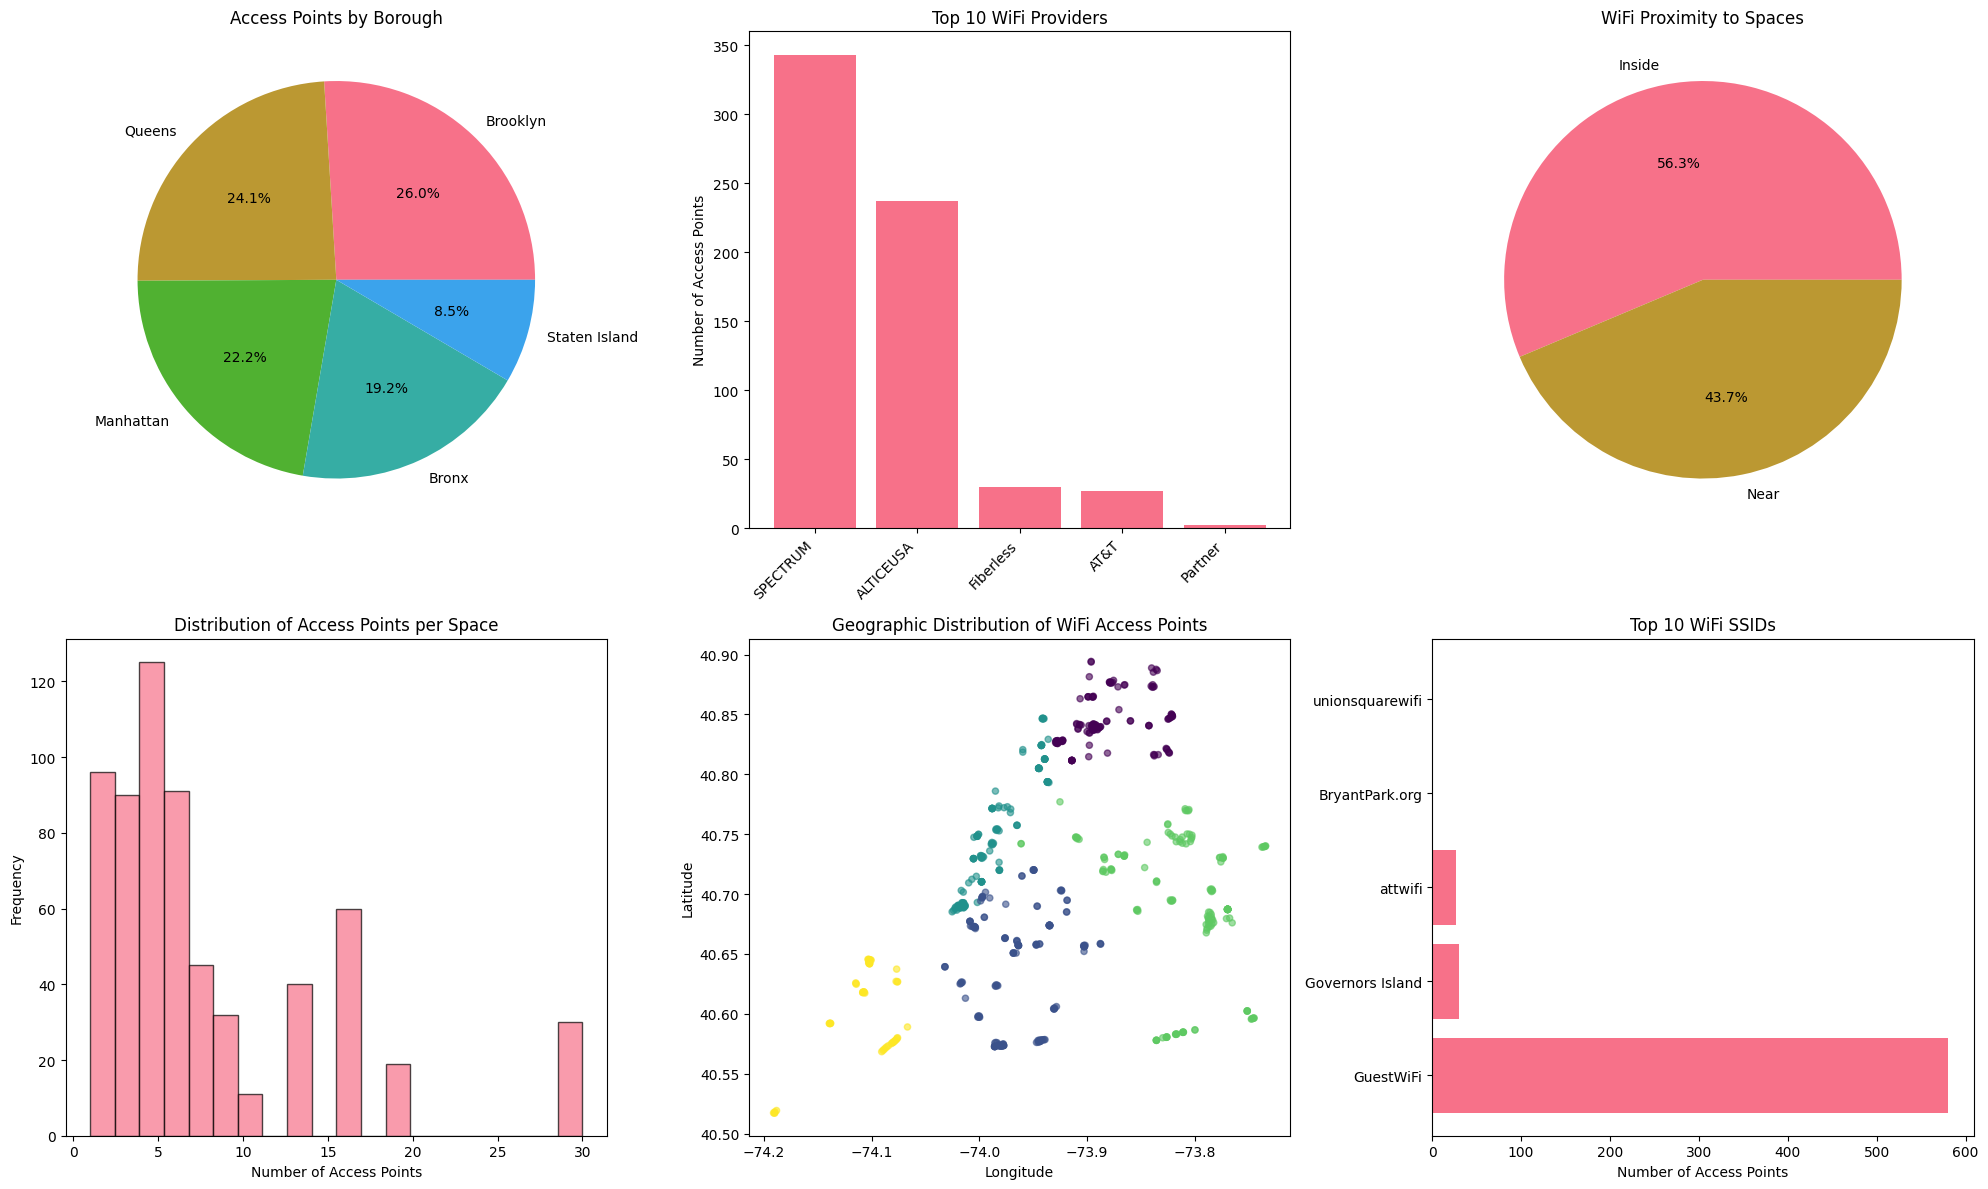

In [12]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Borough distribution
if 'Borough Name' in df.columns:
    borough_counts = df['Borough Name'].value_counts()
    axes[0, 0].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%')
    axes[0, 0].set_title('Access Points by Borough')

# Provider distribution
if 'Provider' in df.columns:
    provider_counts = df['Provider'].value_counts().head(10)
    axes[0, 1].bar(range(len(provider_counts)), provider_counts.values)
    axes[0, 1].set_xticks(range(len(provider_counts)))
    axes[0, 1].set_xticklabels(provider_counts.index, rotation=45, ha='right')
    axes[0, 1].set_title('Top 10 WiFi Providers')
    axes[0, 1].set_ylabel('Number of Access Points')

# Proximity analysis
if 'Public Space (Open Space) Proximity' in df.columns:
    proximity_counts = df['Public Space (Open Space) Proximity'].value_counts()
    axes[0, 2].pie(proximity_counts.values, labels=proximity_counts.index, autopct='%1.1f%%')
    axes[0, 2].set_title('WiFi Proximity to Spaces')

# Access points per space histogram
if 'Number of Access Points per Public Space (Open Space)' in df.columns:
    access_points_col = 'Number of Access Points per Public Space (Open Space)'
    axes[1, 0].hist(df[access_points_col], bins=20, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Distribution of Access Points per Space')
    axes[1, 0].set_xlabel('Number of Access Points')
    axes[1, 0].set_ylabel('Frequency')

# Geographic scatter plot
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    scatter = axes[1, 1].scatter(df['Longitude'], df['Latitude'], 
                                c=pd.Categorical(df['Borough Name']).codes, 
                                alpha=0.6, s=20)
    axes[1, 1].set_title('Geographic Distribution of WiFi Access Points')
    axes[1, 1].set_xlabel('Longitude')
    axes[1, 1].set_ylabel('Latitude')

# SSID distribution (top 10)
if 'SSID' in df.columns:
    ssid_counts = df['SSID'].value_counts().head(10)
    axes[1, 2].barh(range(len(ssid_counts)), ssid_counts.values)
    axes[1, 2].set_yticks(range(len(ssid_counts)))
    axes[1, 2].set_yticklabels(ssid_counts.index)
    axes[1, 2].set_title('Top 10 WiFi SSIDs')
    axes[1, 2].set_xlabel('Number of Access Points')

plt.tight_layout()
plt.show()

=== TOP NEIGHBORHOODS BY WIFI ACCESS POINTS ===


Neighborhood Tabulation Area Name (NTA NAME)
park-cemetery-etc-Bronx                                  34
Seagate-Coney Island                                     31
Governors Island                                         30
park-cemetery-etc-Brooklyn                               25
St. Albans                                               19
East Harlem North                                        18
West Concourse                                           18
Carroll Gardens-Columbia Street-Red Hook                 17
West New Brighton-New Brighton-St. George                17
Baisley Park                                             16
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    15
Sheepshead Bay-Gerritsen Beach-Manhattan Beach           15
Hudson Yards-Chelsea-Flatiron-Union Square               15
West Village                                             13
Old Town-Dongan Hills-South Beach                        12
Name: count, dtype: int64

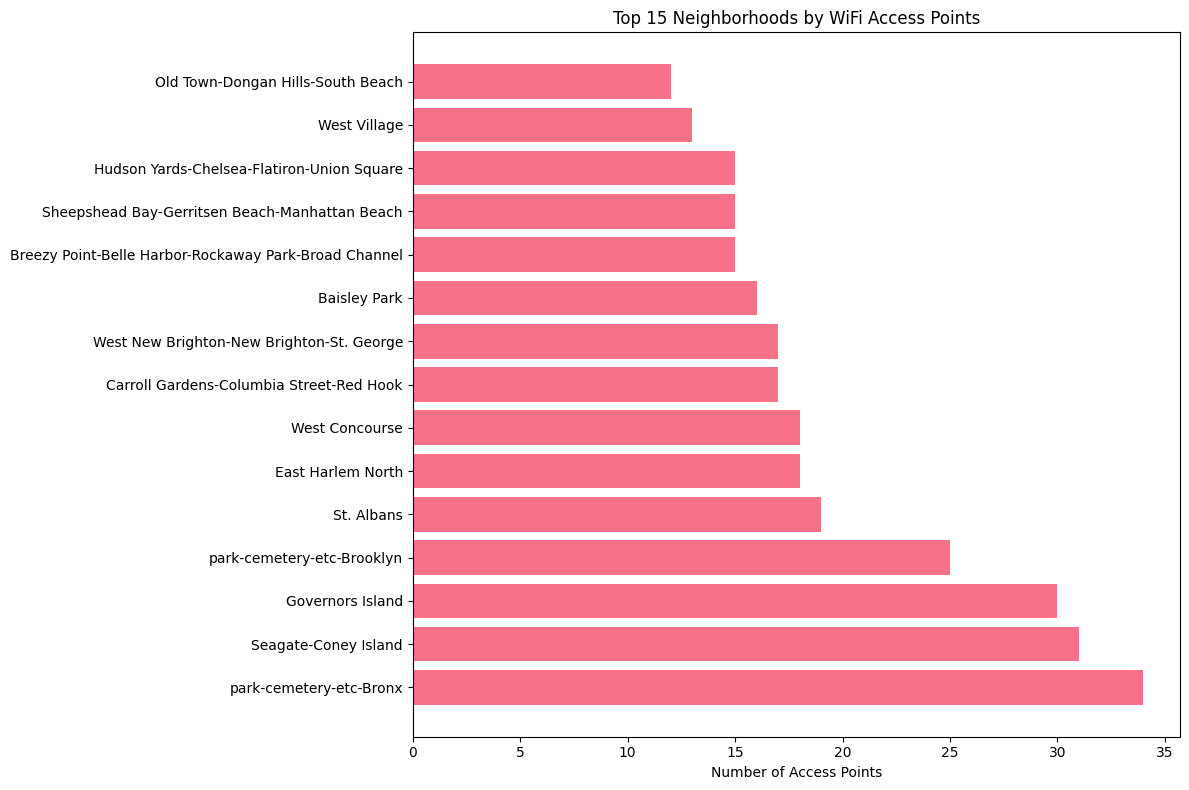

In [14]:
# Neighborhood analysis
if 'Neighborhood Tabulation Area Name (NTA NAME)' in df.columns:
    print("=== TOP NEIGHBORHOODS BY WIFI ACCESS POINTS ===")
    nta_counts = df['Neighborhood Tabulation Area Name (NTA NAME)'].value_counts().head(15)
    display(nta_counts)
    
    # Plot top neighborhoods
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(nta_counts)), nta_counts.values)
    plt.yticks(range(len(nta_counts)), nta_counts.index)
    plt.title('Top 15 Neighborhoods by WiFi Access Points')
    plt.xlabel('Number of Access Points')
    plt.tight_layout()
    plt.show()

## Cross-Analysis

In [15]:
# Cross-tabulation analysis
print("=== CROSS-TABULATION ANALYSIS ===")

if 'Borough Name' in df.columns and 'Provider' in df.columns:
    print("\nBorough vs Provider:")
    crosstab1 = pd.crosstab(df['Borough Name'], df['Provider'], margins=True)
    display(crosstab1)

if 'Borough Name' in df.columns and 'Public Space (Open Space) Proximity' in df.columns:
    print("\nBorough vs Proximity:")
    crosstab2 = pd.crosstab(df['Borough Name'], df['Public Space (Open Space) Proximity'], margins=True)
    display(crosstab2)

=== CROSS-TABULATION ANALYSIS ===

Borough vs Provider:


Provider,ALTICEUSA,AT&T,Fiberless,Partner,SPECTRUM,All
Borough Name,,,,,,
Bronx,120,3,0,0,0,123
Brooklyn,117,6,0,0,43,166
Manhattan,0,13,30,2,97,142
Queens,0,3,0,0,151,154
Staten Island,0,2,0,0,52,54
All,237,27,30,2,343,639



Borough vs Proximity:


Public Space (Open Space) Proximity,Inside,Near,All
Borough Name,,,
Bronx,72,51,123
Brooklyn,108,58,166
Manhattan,74,68,142
Queens,64,90,154
Staten Island,42,12,54
All,360,279,639


In [16]:
# Provider market share analysis
print("=== PROVIDER MARKET ANALYSIS ===")
if 'Provider' in df.columns:
    provider_stats = df.groupby('Provider').agg({
        'OID': 'count',
        'Public Space (Open Space) Name': 'nunique',
        'Borough Name': 'nunique'
    }).rename(columns={
        'OID': 'Total_Access_Points',
        'Public Space (Open Space) Name': 'Unique_Spaces',
        'Borough Name': 'Boroughs_Served'
    })
    
    provider_stats['Market_Share_%'] = (provider_stats['Total_Access_Points'] / provider_stats['Total_Access_Points'].sum() * 100).round(2)
    
    display(provider_stats.sort_values('Total_Access_Points', ascending=False))

=== PROVIDER MARKET ANALYSIS ===


,Total_Access_Points,Unique_Spaces,Boroughs_Served,Market_Share_%
Provider,,,,
SPECTRUM,343,65,4,53.68
ALTICEUSA,237,42,2,37.09
Fiberless,30,1,1,4.69
AT&T,27,23,5,4.23
Partner,2,2,1,0.31


## Data Quality Summary & Recommendations

In [17]:
print("=== DATA QUALITY SUMMARY ===")
print("\n1. COMPLETENESS:")
for col in df.columns:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    if missing_pct > 0:
        print(f"   - {col}: {missing_pct:.1f}% missing values")
    
print("\n2. GEOGRAPHIC DATA QUALITY:")
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    coord_issues = df[(df['Latitude'] == 0) | (df['Longitude'] == 0)].shape[0]
    print(f"   - Coordinates at (0,0): {coord_issues}")
    
    # Check for reasonable coordinate ranges (NYC area)
    lat_range_ok = df[(df['Latitude'] >= 40.4) & (df['Latitude'] <= 41.0)].shape[0]
    lon_range_ok = df[(df['Longitude'] >= -74.5) & (df['Longitude'] <= -73.5)].shape[0]
    print(f"   - Points within NYC lat range: {lat_range_ok}/{len(df)}")
    print(f"   - Points within NYC lon range: {lon_range_ok}/{len(df)}")

print("\n3. TEMPORAL DATA:")
if 'Published Date' in df.columns:
    date_consistency = df['Published Date'].value_counts()
    print(f"   - Unique publication dates: {len(date_consistency)}")
    print(f"   - Most common date: {date_consistency.index[0]} ({date_consistency.iloc[0]} records)")

print("\n4. BUSINESS LOGIC CHECKS:")
if 'Number of Access Points per Public Space (Open Space)' in df.columns:
    access_col = 'Number of Access Points per Public Space (Open Space)'
    # Check if actual count matches reported count
    space_counts = df.groupby('Public Space (Open Space) Name').size()
    reported_counts = df.groupby('Public Space (Open Space) Name')[access_col].first()
    
    mismatches = (space_counts != reported_counts).sum()
    print(f"   - Spaces where actual count ≠ reported count: {mismatches}")

print("\n5. RECOMMENDATIONS:")
recommendations = []

if df.duplicated().sum() > 0:
    recommendations.append("Remove or investigate duplicate records")
    
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    if coord_issues > 0:
        recommendations.append("Investigate and fix coordinates at (0,0)")
        
if len(date_consistency) == 1:
    recommendations.append("All records have same publication date - verify if this is accurate")

if mismatches > 0:
    recommendations.append("Reconcile discrepancies between reported and actual access point counts")

recommendations.append("Consider geocoding validation for location accuracy")
recommendations.append("Implement data freshness monitoring for WiFi availability")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

=== DATA QUALITY SUMMARY ===

1. COMPLETENESS:

2. GEOGRAPHIC DATA QUALITY:
   - Coordinates at (0,0): 0
   - Points within NYC lat range: 639/639
   - Points within NYC lon range: 639/639

3. TEMPORAL DATA:
   - Unique publication dates: 1
   - Most common date: 2019-05-30 00:00:00 (639 records)

4. BUSINESS LOGIC CHECKS:
   - Spaces where actual count ≠ reported count: 23

5. RECOMMENDATIONS:
   1. All records have same publication date - verify if this is accurate
   2. Reconcile discrepancies between reported and actual access point counts
   3. Consider geocoding validation for location accuracy
   4. Implement data freshness monitoring for WiFi availability
